# Requirements

In [2]:
import pandas as pd
import missingno as msno
import numpy as np

In [3]:
# Add as many imports as you need.

## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [7]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('obesity.csv')
data.head()

,Unnamed: 0,id,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,0,0.0,Male,24.443011,1.699998,81.669950,2.0,2.983297,no,2.763573,0.000000,0.976473,Public_Transportation,NaN
1,1,1.0,Female,18.000000,1.560000,57.000000,2.0,3.000000,no,NaN,NaN,1.000000,Automobile,Normal_Weight
2,2,2.0,Female,18.000000,NaN,50.165754,NaN,1.411685,no,NaN,0.866045,NaN,Public_Transportation,Insufficient_Weight
3,3,3.0,NaN,20.952737,1.710730,131.274851,3.0,3.000000,no,1.674061,1.467863,0.780199,Public_Transportation,NaN
4,4,NaN,Male,31.641081,1.914186,NaN,NaN,1.971472,no,NaN,1.967973,0.931721,Public_Transportation,Overweight_Level_II


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20758 non-null  int64  
 1   id          16618 non-null  float64
 2   Gender      16634 non-null  object 
 3   Age         16608 non-null  float64
 4   Height      16667 non-null  float64
 5   Weight      16477 non-null  float64
 6   FCVC        16641 non-null  float64
 7   NCP         16697 non-null  float64
 8   SMOKE       16648 non-null  object 
 9   CH2O        16597 non-null  float64
 10  FAF         16619 non-null  float64
 11  TUE         16611 non-null  float64
 12  MTRANS      16600 non-null  object 
 13  NObeyesdad  16625 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 2.2+ MB


Explore the dataset using visualizations of your choice.

In [10]:
# Write your code here. Add as many boxes as you need.

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [12]:
# Write your code here. Add as many boxes as you need.
data.isnull().sum()

Unnamed: 0       0
id            4140
Gender        4124
Age           4150
Height        4091
Weight        4281
FCVC          4117
NCP           4061
SMOKE         4110
CH2O          4161
FAF           4139
TUE           4147
MTRANS        4158
NObeyesdad    4133
dtype: int64

In [13]:
percent = data.isnull().sum() / len(data) * 100

In [14]:
percent

Unnamed: 0     0.000000
id            19.944118
Gender        19.867039
Age           19.992292
Height        19.708064
Weight        20.623374
FCVC          19.833317
NCP           19.563542
SMOKE         19.799595
CH2O          20.045284
FAF           19.939301
TUE           19.977840
MTRANS        20.030831
NObeyesdad    19.910396
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

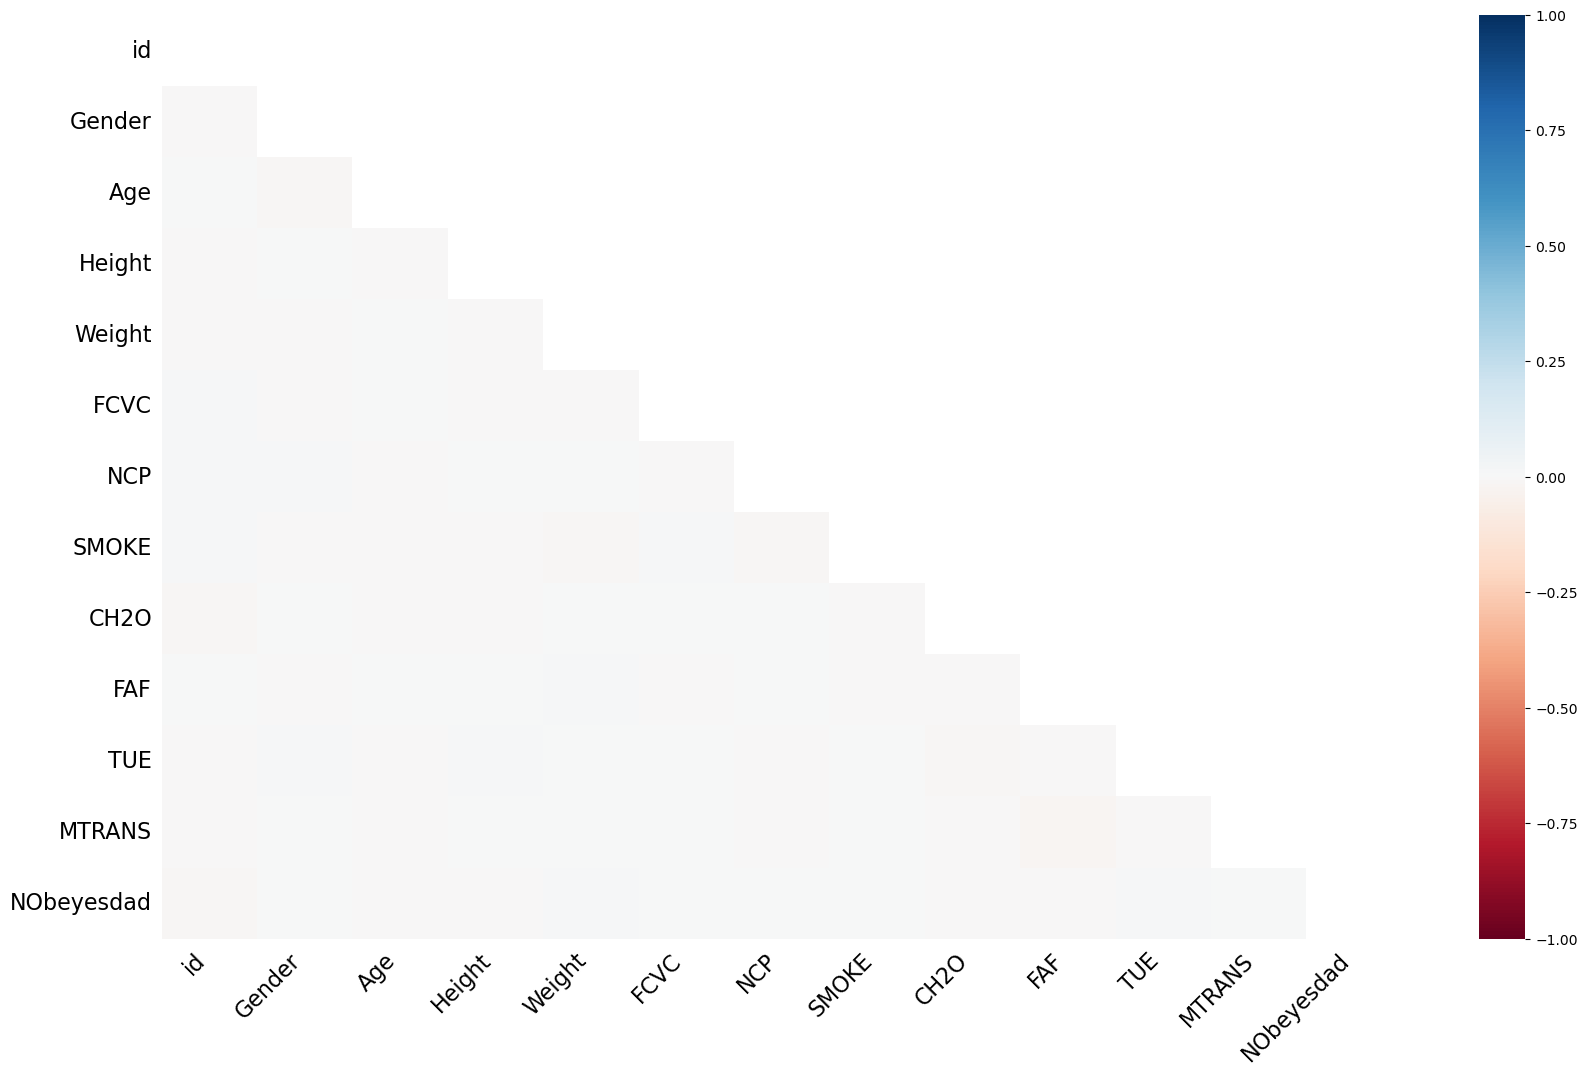

In [16]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)

<Axes: >

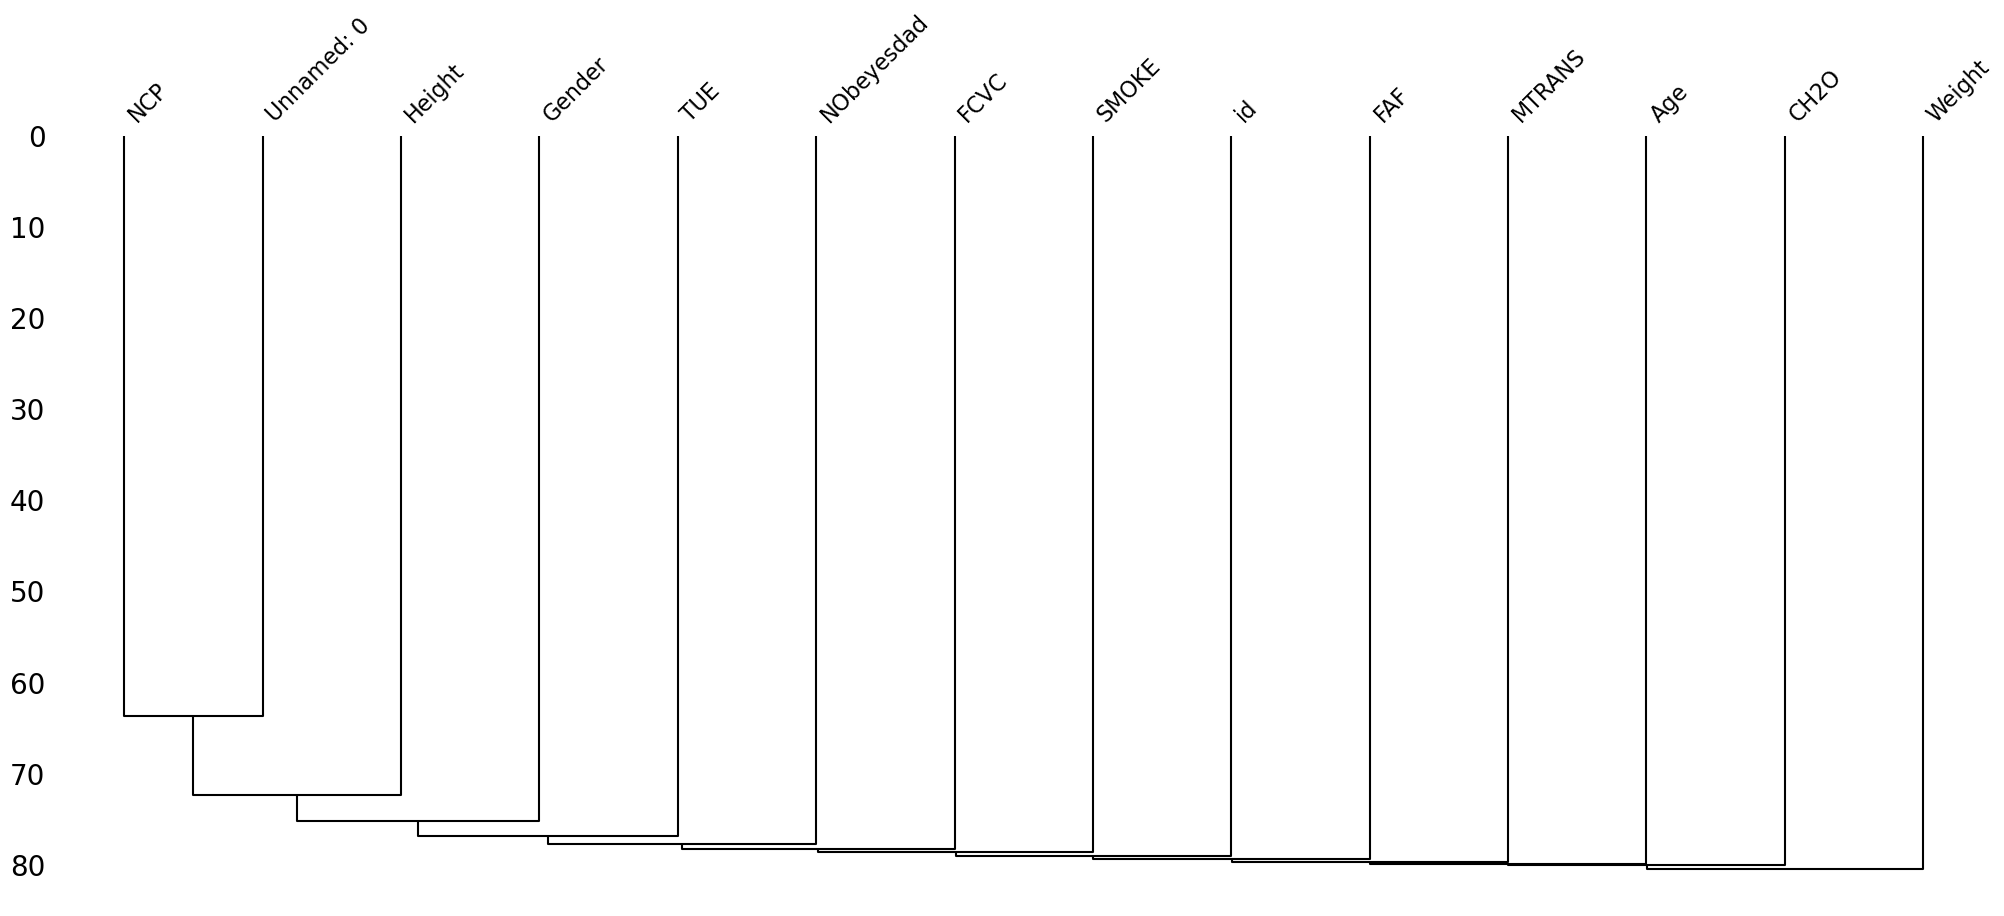

In [17]:
msno.dendrogram(data)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [19]:
# Write your code here. Add as many boxes as you need.
def drop_data(data,columns):
    data_copy = data.copy()
    data_copy.drop(columns,axis=1,inplace=True)
    return data_copy

In [20]:
from sklearn.impute import SimpleImputer

In [32]:
def simple_impute(data,columns,strategy):
    imp = SimpleImputer(strategy=strategy)
    data_copy = data.copy()

    for c in columns:
        data_copy[c] = imp.fit_transform(data_copy[[c]]).ravel()
    return data_copy

In [34]:
from sklearn.preprocessing import LabelEncoder

In [36]:
def label(data,columns):
    enc = LabelEncoder()
    data_copy = data.copy()

    for c in columns:
        data_copy[c] = enc.fit_transform(data_copy[[c]].astype(str).values.ravel())
    return data_copy

In [38]:
data = drop_data(data=data,columns=['id','Unnamed: 0','MTRANS'])
data.head()

KeyError: "['id', 'Unnamed: 0', 'MTRANS'] not found in axis"

In [25]:
data.isnull().sum()

Gender        4124
Age           4150
Height        4091
Weight        4281
FCVC          4117
NCP           4061
SMOKE         4110
CH2O          4161
FAF           4139
TUE           4147
NObeyesdad    4133
dtype: int64

In [26]:
data = simple_impute(data=data,columns=['Age','Height','Weight','FCVC','NCP','CH2O','TUE','FAF'],strategy='mean')
data.sample(10)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,NObeyesdad
19115,Male,30.605225,1.661403,124.805868,2.000000,2.759481,no,1.400770,1.553734,0.618256,Obesity_Type_II
11742,NaN,22.000000,1.700000,78.000000,1.000000,3.000000,no,2.000000,0.975865,1.000000,Overweight_Level_II
12260,Female,20.406066,1.775626,85.316125,2.445041,3.000000,NaN,2.102709,0.975865,0.618256,Obesity_Type_I
3833,Female,22.518787,1.700150,88.138777,2.366949,2.759481,no,2.000000,0.893362,0.000000,NaN
13759,Male,18.000000,1.802257,108.742005,2.067817,3.000000,no,2.497065,1.000000,1.344072,Obesity_Type_I
16012,Female,21.000000,1.540000,42.000000,2.000000,2.759481,no,1.000000,1.000000,0.000000,Insufficient_Weight
10363,Female,23.850701,1.630000,63.000000,3.000000,3.000000,no,2.000000,2.000000,0.618256,NaN
12782,Male,23.850701,1.700150,106.421042,2.000000,3.000000,no,3.000000,1.999836,1.000000,Obesity_Type_I
2392,Female,25.998646,1.700150,113.235538,3.000000,3.000000,no,2.893117,0.003420,0.261793,Obesity_Type_III
10105,NaN,23.000000,1.787787,90.000000,2.000000,2.759481,no,2.000000,0.000000,1.946173,Obesity_Type_I


In [40]:
data = simple_impute(data=data,columns=['Gender','SMOKE','NObeyesdad'],strategy='most_frequent')

In [42]:
data.sample(15)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,NObeyesdad
19599,Male,23.000000,1.800000,75.000000,2.000000,3.000000,no,3.000000,0.975865,1.000000,Normal_Weight
2140,Female,18.000000,1.691206,87.905350,2.445041,3.000000,no,1.000000,0.520407,1.560402,Insufficient_Weight
20538,Female,22.591439,1.596813,82.040318,2.000000,2.870661,no,2.000000,0.882709,2.000000,Obesity_Type_III
11967,Male,17.000000,1.600000,65.000000,3.000000,3.000000,no,2.000000,0.000000,0.618256,Overweight_Level_I
3648,Female,23.421726,1.507106,64.814109,1.572230,2.983201,no,2.000000,0.937320,0.890626,Overweight_Level_II
10091,Male,23.850701,1.750000,118.073810,2.219186,2.759481,no,2.008361,0.202029,0.000000,Obesity_Type_III
15332,Female,19.920629,1.570811,61.264785,2.780699,2.372311,no,2.825629,0.233056,0.920858,Overweight_Level_I
1542,Male,23.884212,1.700150,81.108599,2.000000,2.759481,no,1.859089,1.810738,0.000000,Obesity_Type_III
14178,Female,21.413498,1.700150,133.843033,3.000000,3.000000,no,2.535629,0.975865,0.803141,Obesity_Type_III
9109,Male,23.850701,1.761519,112.555456,1.261288,3.000000,no,2.000000,0.000000,0.374650,Obesity_Type_II


In [44]:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
NCP           0
SMOKE         0
CH2O          0
FAF           0
TUE           0
NObeyesdad    0
dtype: int64

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [46]:
# Write your code here. Add as many boxes as you need.
data = label(data=data,columns=['Gender','SMOKE','NObeyesdad'])
data.sample(5)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,NObeyesdad
5808,1,29.827481,1.764140,124.269251,2.048962,2.759481,0,2.040952,0.822186,0.808980,4
11233,0,26.000000,1.656504,111.821817,3.000000,3.000000,0,2.550570,0.000000,0.618256,4
11679,0,18.000000,1.700150,71.000000,2.000000,2.759481,0,2.000000,1.000000,1.000000,1
13788,1,20.000000,1.700150,80.000000,2.000000,3.000000,0,2.000000,1.000000,0.618256,6
478,1,30.717727,1.700150,129.991623,2.111887,3.000000,1,1.290979,1.042680,0.000000,3


## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [48]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

In [52]:
input = data.copy()
input = drop_data(data=input,columns=['FAF'])

In [54]:
input.head()

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,TUE,NObeyesdad
0,1,24.443011,1.699998,81.669950,2.000000,2.983297,0,2.763573,0.976473,4
1,0,18.000000,1.560000,57.000000,2.000000,3.000000,0,2.027584,1.000000,1
2,0,18.000000,1.700150,50.165754,2.445041,1.411685,0,2.027584,0.618256,0
3,0,20.952737,1.710730,131.274851,3.000000,3.000000,0,1.674061,0.780199,4
4,1,31.641081,1.914186,87.905350,2.445041,1.971472,0,2.027584,0.931721,6


In [56]:
target = data.copy()['FAF']
target.head()

0    0.000000
1    0.975865
2    0.866045
3    1.467863
4    1.967973
Name: FAF, dtype: float64

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.2)


In [80]:
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV



In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.2)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)


param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'alpha': [1, 2, 5]
}


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and model
best_params = grid_search.best_params_
xgb_model = grid_search.best_estimator_

# Cross-validation results
xgb_cv_results = cross_validate(xgb_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=False)
xgb_mse = -np.mean(xgb_cv_results['test_score'])
xgb_rmse = np.sqrt(xgb_mse)

# Final model evaluation
xgb_y_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(Y_test, xgb_y_pred)

# Print evaluation metrics
print("XGBoost Model Performance:")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"R2: {xgb_r2}")


C:\Users\kolov\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


XGBoost Model Performance:
MSE: 0.4090704059675194
RMSE: 0.6395861208371547
R2: 0.2701228806649498


# Cross-validation evaluation

Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.